# Exercise 1 - Discrete random variable

### The probability distribution function of a discrete variable k is given by the following:

$$
p(k)=
\left\{
\begin{array}{ll}
      \cfrac{k}{15} & {\rm with} \; k = 1, 2, 3, 4, 5 \\
      0 & {\rm otherwise}
\end{array} 
\right.
$$

### 1) write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention

In [1]:
dex1 <- function(k) {
    length <- length(k)
    pdf <- integer(length)
    for (i in 1:length)
        if (k[i] %in% 1:5) pdf[i] <- k[i]/15
        else pdf[i] <- 0
    return(pdf)
}

In [2]:
pex1 <-function(k) {
    return(cumsum(dex1(k)))
}

### 2) produce two plots showing the pdf and cdf, separately

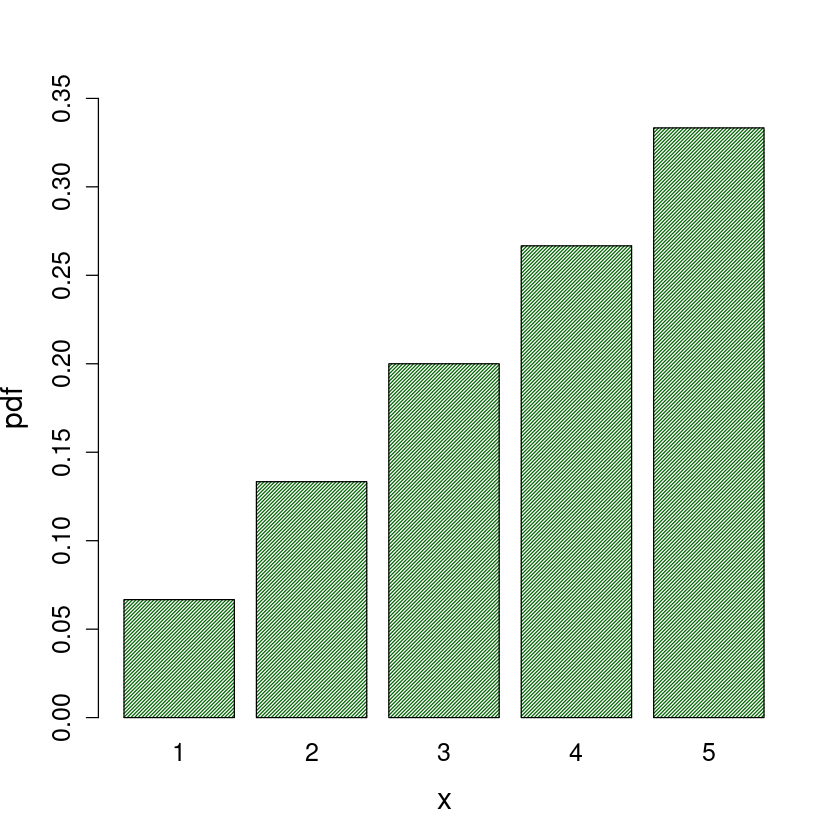

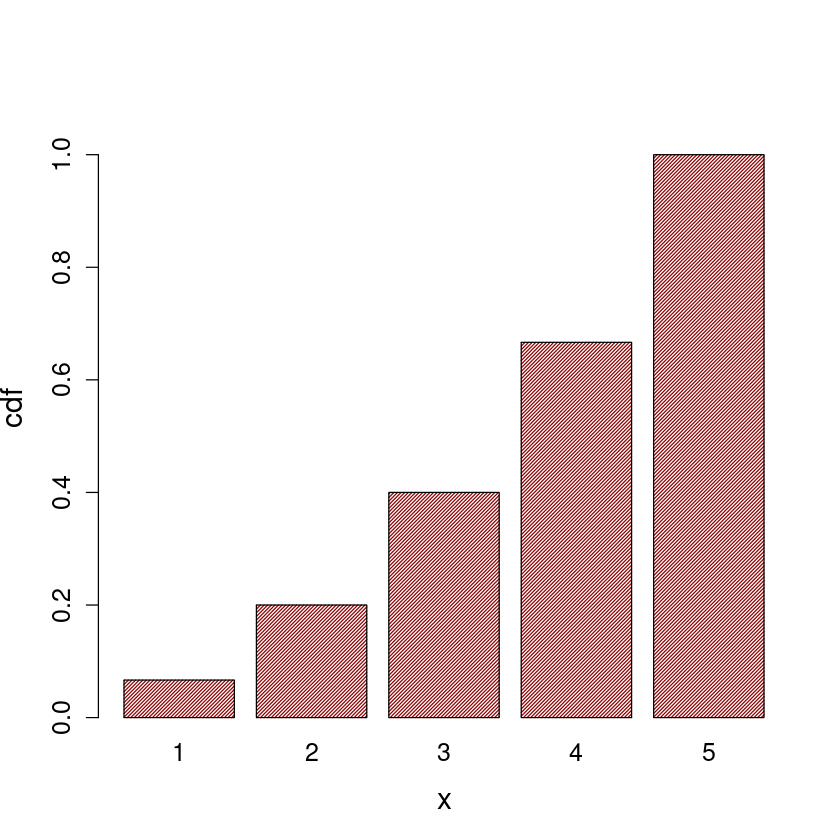

In [3]:
num = 5
a <- c(1:num)
pdf <- dex1(a)
cdf <- pex1(a)

barplot(pdf, names=a, col='darkgreen', xlab='x', ylab='pdf',
        density = 50,
        main = '',
        ylim=c(0,0.35),
        cex.lab = 1.5,
        cex.axis = 1.25,
        cex = 1.25)

barplot(cdf, names=a, col='darkred', xlab='x', ylab='cdf',
        density = 50,
        main = '',
        ylim=c(0,1.1),
        cex.lab = 1.5,
        cex.axis = 1.25,
        cex = 1.25)

### 3) compute, using R, the mean value and variance of the probability distribution

Mean value and variance for a discrete distribution:
$$ E[x] = \sum_i x_i p(x_i) $$
$$ var(x) = E[x^2] - (E[x])^2 $$

In [4]:
E_x <- function(x,p) {return( sum(x*p) )}

var_x <- function(x,p) {return( E_x(x**2, p) - E_x(x,p)**2 )}

In [5]:
cat("Mean value: E[x] = ", E_x(a, pdf))

Mean value: E[x] =  3.666667

In [6]:
cat("Variance: var(x) = ", var_x(a, pdf))

Variance: var(x) =  1.555556

### 4) compute, using R, the expected value $E[k (6 − k)]$

In [7]:
cat("E[k(6 − k)] = ", E_x(a*(6-a), pdf))

E[k(6 − k)] =  7

note: using properties of mean, we can find that:
$$ E[k(6-k)] = 6E[k] - E[k^2] $$

In [8]:
cat("(check) E[k(6 − k)] = ", 6*E_x(a, pdf) - E_x(a**2, pdf))

(check) E[k(6 − k)] =  7

### 5) write the R function that allows to sample random numbers from the probability distribution

In [9]:
rex1 <- function(num, a, cdf) {
    
    vector <- integer(num)
    rnums <- runif(num, 0, 1)
    
    for (i in 1:num) {
        if (rnums[i] > cdf[1]) {
            vector[i] <- a[which(cdf > rnums[i])[1]] }
        else vector[i] <- a[1]
    }
    
    return(vector)
    
}

### 6) using the implemented function (point (5)), sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

In [10]:
num = 10**5
mc <- rex1(num, a, cdf)

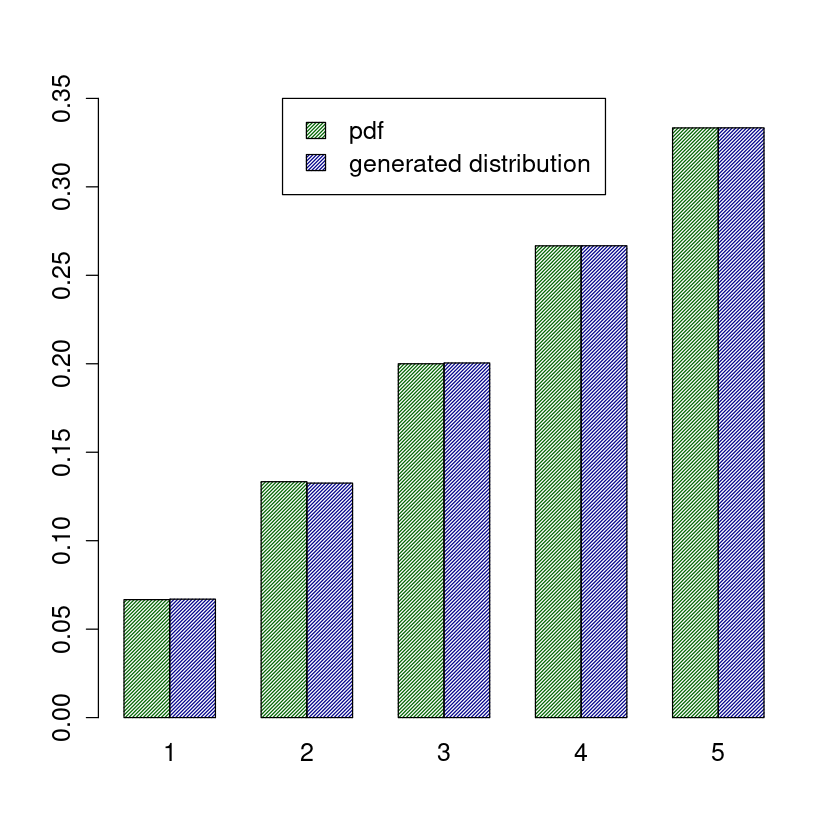

In [11]:
grouped <- rbind(pdf, table(mc)/num)
barplot(grouped,
        beside = TRUE,
        col = c("darkgreen", "darkblue"),
        density = 50,
        ylim = c(0,0.35),
        legend.text = c('pdf', 'generated distribution'),
        args.legend = list(cex=1.25,x = "top"),
        cex.lab = 1.5,
        cex.axis = 1.25,
        cex = 1.25)

# Exercise 2 - Continuous random variable

### The triangular distribution, in the interval $(a, b)$, is given by the following:

$$
f(x)=
\left\{
\begin{array}{ll}
      \cfrac{2(x-a)}{(b-a)(c-a)} &  a \le x < c \\
      \cfrac{2(b-x)}{(b-a)(b-c)} &  c \le x \le b \\
      0 & {\rm otherwise}
\end{array} 
\right.
$$

### where $c \in [a,b]$

### a) plot the function, given the interval (a, b)

Setting a, b, c:

In [12]:
a <- 1
b <- 5
c <- 2

Function for the pdf:

In [13]:
dtriangular <- function(x, a, b, c) {
    length <- length(x)
    fx <- numeric(length)
    for (i in 1:length){
        
        if (x[i]<c & x[i]>=a) fx[i] <- 2*(x[i] - a)/((b-a)*(c-a))
        else if (x[i]<=b & x[i]>=c) fx[i] <- 2*(b - x[i])/((b-a)*(b-c))
        else fx[i] <- 0
        
    }
    return(fx)
}

Plotting:

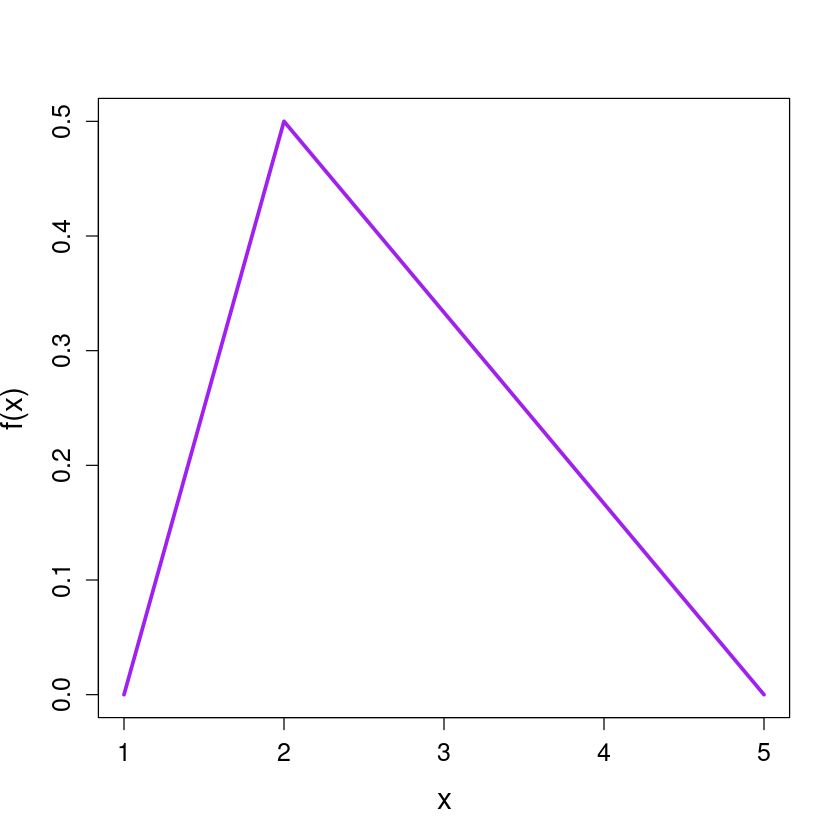

In [14]:
dx = 0.01
x <- seq(a, b, by=dx)
pdf_tr <- dtriangular(x, a, b, c)

plot(x, pdf_tr, type='l', col='purple', lwd=3,
     xlab='x', ylab='f(x)',
     cex.lab = 1.5,
     cex.axis = 1.25,
     cex = 1.25)

### b) and write an algorithm to generate random numbers from the triangular distribution

Function for cdf:

In [15]:
ptriangular <- function(x, dx, a, b, c) {
    return(cumsum( dtriangular(x, a, b, c)*dx ))
}

In [16]:
cdf_tr <- ptriangular(x, dx, a, b, c)

Function to generate numbers from triangular distribution:

In [17]:
rtriangular <- function(num, x, cdf) {
    
    vector <- numeric(num)
    rnums <- runif(num, 0, 1)
    
    for (i in 1:num) {
        if (rnums[i] > cdf[1]) {
            vector[i] <- x[which(cdf > rnums[i])[1]] }
        else vector[i] <- x[1]
    }
    
    return(vector)
    
}

### c) generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

In [18]:
num = 10**4
mc_tr <- rtriangular(num, x, cdf_tr)

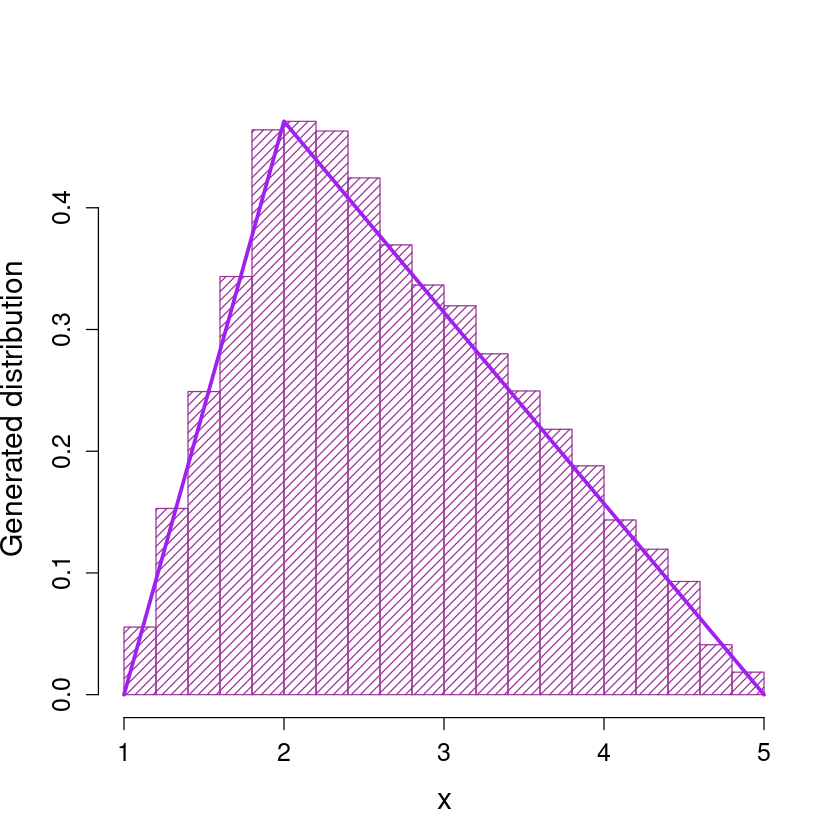

In [19]:
hist(mc_tr, col = "#993399",
        prob = TRUE,
        density = 20,
        main = '',
        xlab='x', ylab='Generated distribution',
        breaks = 20,
        cex.lab = 1.5,
        cex.axis = 1.25,
        cex = 1.25)

par(new = TRUE)
plot(x, pdf_tr, type='l', col='purple', lwd=3, axes = FALSE, ann = FALSE,
     cex.lab = 1.5,
     cex.axis = 1.25,
     cex = 1.25)

# Exercise 3

### The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30


### A) simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

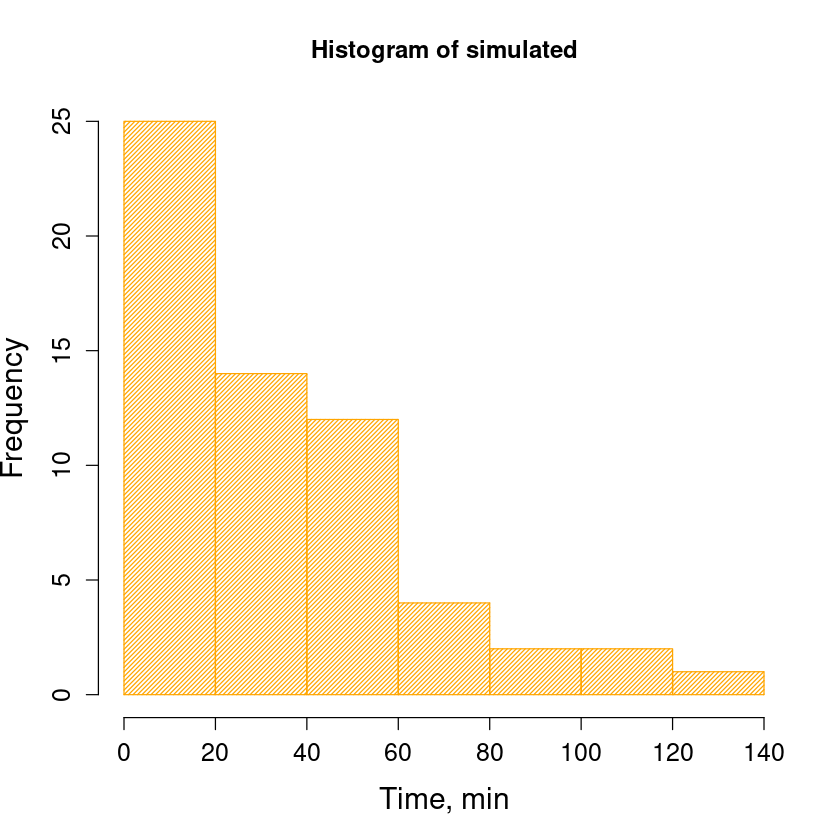

In [20]:
set.seed(1234)
n <- 60
lambda <- 1/30

simulated <- rexp(n, rate = lambda)

hist(simulated,
     col = "orange",
     density = 40,
     xlab='Time, min', ylab='Frequency',
     cex.lab = 1.5,
     cex.axis = 1.25,
     cex = 1.25)

### B) what is the probability that a person will wait for less than 12 minutes?

We need to find $P(X<12)$: 

In [21]:
cat("P(X<12) = ", pexp(12,lambda))

P(X<12) =  0.32968

### C) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [22]:
cat("Expected value from theory: ", 1/lambda)

Expected value from theory:  30

In [23]:
cat("Mean value of simulated data: ", mean(simulated))

Mean value of simulated data:  31.8357

### D) what is the probability for waiting more than one hour before being received?

In [24]:
cat("P(X>60) = ", 1 - pexp(60,lambda))

P(X>60) =  0.1353353

# Exercise 4 - Multiple choices exams

### The final exam of a course is given to the students in the format of a multiple choice written test:
### - for each questions there are five possible alternatives.

### - a student either knows the answer, or selects randomly the answer among the five possible choices

### - assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what is the probability that the student really knew the correct answer?

### Write a small R program to provide the answer

Defining propositions:

A := student knows the answer

B := student answers correctly

Then the given information leads to defining these probabilities:

1) $P(A) = 0.7$

2) $P(B|\bar{A}) = 0.2$ (random selection between 5 answers)

3) $P(B|A) = 1$ (student knows $\rightarrow$ student answers correctly)

The question is to find $P(A|B)$.

From the Bayes theorem:

$P(A|B) = \cfrac{P(B|A) P(A)}{P(B)}$

In [25]:
P_A <- 0.7
P_B_Abar <- 0.2
P_B_A <- 1

1) Finding $P(\bar{A}B) = P(B|\bar{A}) P(\bar{A})$:

In [26]:
P_AbarB <- P_B_Abar * (1 - P_A)
P_AbarB

[1] 0.06

2) Finding $P(AB) = P(B|A) P(A)$:

In [27]:
P_AB <- P_B_A * P_A
P_AB

[1] 0.7

3) Finding $P(B) = P(AB) + P(\bar{A}B)$:

In [28]:
P_B <- P_AB + P_AbarB
P_B

[1] 0.76

4) Finally applying Bayes theorem and getting the result:

In [29]:
P_A_B <- (P_B_A * P_A)/P_B
round(P_A_B, 3)

[1] 0.921

# Exercise 5 - Waiting time

### Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano.

### Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait

Assume that trains arrive regularly (a very big assumption in Italy...), so that the random variable X - time of waiting for a train arrival - has a uniform distribution $\cfrac{1}{30}.$ We do not care about the specific time interval (e.g. 10:45-11:45), since at most this person will wait for 30 min.

In [30]:
a <- 0
b <- 30

### a) at most 10 minutes

In [31]:
cat("P[X<=10] = ", punif(10, a, b))

P[X<=10] =  0.3333333

Theoretical check:

$P[X \le 10] = \int^{10}_{0} \cfrac{1}{30} dx = \cfrac{1}{3}$

### b) at least 15 minutes

In [32]:
cat("P[X>=15] = ", 1 - punif(15, a, b))

P[X>=15] =  0.5

Theoretical check:

$P[X \ge 15] = \int^{30}_{15} \cfrac{1}{30} dx = \cfrac{1}{2}$

### c) what is the average time spent waiting?

Using random variables generated from the uniform distribution:

In [33]:
x_sim <- runif(1000, a, b)
cat("Average time spent waiting:", round(mean(x_sim),0), "min")

Average time spent waiting: 15 min

In [34]:
cat("Theoretical prediction:", (a+b)/2, "min")

Theoretical prediction: 15 min

# Exercise 6 - stock investment
### The annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation

### Mr X decides to buy 200 share of that specific stock at a price of 85 euro per share.

### What is the probability that after a year his net profit from the investment is at least 800 euro? (suppose there are no transaction costs and that there are no annual dividend for the stock)

Mr X has the same shares, so that each price of the share is not independent from each other (they change together synchroniusly).

Thus we can investigate only one share.

The increase in price needed for one share is:

In [35]:
price <- 85
n <- 200
net_profit <- 800

increase_euro <- net_profit/n
increase_percent <- increase_euro/price
cat("Needed increase of the share's price:", increase_percent, "%")

Needed increase of the share's price: 0.04705882 %

Then the task is to find the probability that annual return rate is greater than increase_percent

In [36]:
mu <- 0.1
sigma2 <- 0.12

prob <- 1 - pnorm(increase_percent, mean = mu, sd = sigma2)
cat("Answer:", prob)

Answer: 0.6704574